# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_set = pd.read_csv("data/sets.csv")
df_color = pd.read_csv("data/colors.csv")
df_themes = pd.read_csv("data/themes.csv")




# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [5]:
plt.plot(set_by_year.index, set_by_year.set_num)
plt.show()

NameError: name 'set_by_year' is not defined

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [6]:
%%html


UsageError: %%html is a cell magic, but the cell body is empty.


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [7]:
%%html
<img src="assets/bricks.jpg" alt="alt text" style="width: 200px;"/>

In [8]:
set_by_year = df_set.query('year < 2020').groupby("year").count()
set_by_year

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2015,774,774,774,774
2016,757,757,757,757
2017,786,786,786,786


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [9]:
  #set_by_year.set_num
set_by_theme = df_set.query('year < 2020').groupby("year").agg("nunique")
set_by_theme

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,2,4
1950,6,6,1,1
1953,4,4,2,4
1954,14,13,2,5
1955,28,27,4,22
...,...,...,...,...
2015,774,760,98,306
2016,757,750,92,330
2017,786,760,89,325


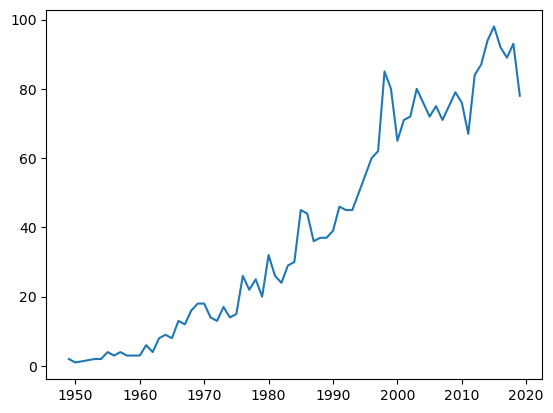

In [15]:
plt.plot(set_by_theme.index, set_by_theme.theme_id)
plt.show()

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

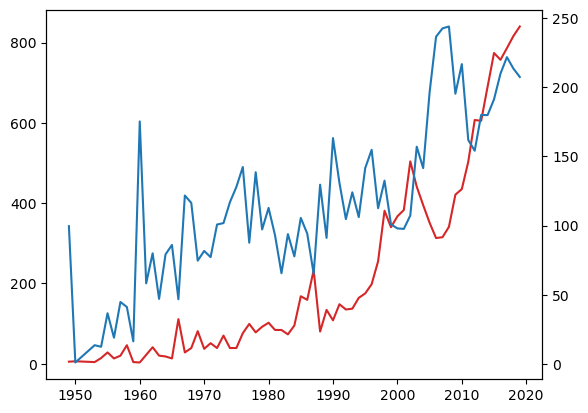

In [91]:
ax1 = plt.gca() # get the axis
ax2 = ax1.twinx()

color = 'tab:red'
ax1.plot(set_by_theme.index, set_by_year["name"], color=color)


color = 'tab:blue'
ax2.plot(set_by_theme.index, set_by_theme["num_parts"], color=color)


 # otherwise the right y-label is slightly clipped
plt.show()

### Line Charts with Two Seperate Axes

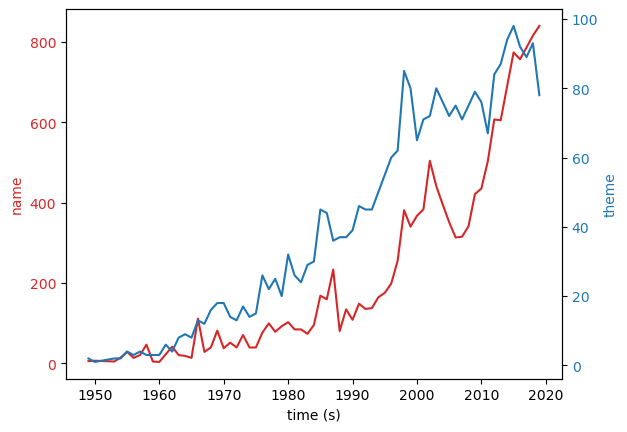

In [28]:
ax2, ax1 = plt.subplots() # get current axes

color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('name', color=color)
ax1.plot(set_by_theme.index, set_by_year["name"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('theme', color=color)  # we already handled the x-label with ax1
ax2.plot(set_by_theme.index, set_by_theme["theme_id"], color=color)
ax2.tick_params(axis='y', labelcolor=color)


 # otherwise the right y-label is slightly clipped
plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [32]:
set_by_theme = df_set.query('year < 2020').groupby("year").agg({'num_parts': pd.Series.mean})
set_by_theme

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2015,191.379845
2016,209.920740
2017,221.840967


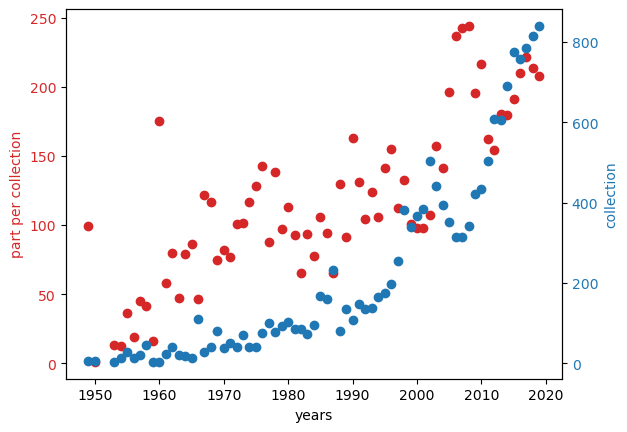

In [40]:
ax2, ax1 = plt.subplots() # get current axes

color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('part per collection', color=color)
ax1.scatter(set_by_theme.index, set_by_theme["num_parts"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('collection', color=color)  # we already handled the x-label with ax1
ax2.scatter(set_by_theme.index, set_by_year["name"], color=color)
ax2.tick_params(axis='y', labelcolor=color)


 # otherwise the right y-label is slightly clipped
plt.show()

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

In [47]:
merged = pd.merge(df_set,df_themes, how= "inner", left_on='theme_id', right_on='id')
df_set.groupby("theme_id").count().sort_values("name")  

,set_num,name,year,num_parts
theme_id,,,,
475,1,1,1,1
515,1,1,1,1
519,1,1,1,1
510,1,1,1,1
383,1,1,1,1
...,...,...,...,...
503,329,329,329,329
435,356,356,356,356
494,398,398,398,398


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [76]:
merged

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,1,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,1,Technic,NaN
...,...,...,...,...,...,...,...,...
15705,K6762-1,Western Kit,2002,475,0,475,Western,NaN
15706,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
15707,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0
15708,LLCA30-1,Pirate Ship Diorama (LLCA Ambassador Pass Excl...,2006,430,127,430,Pirates,425.0


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [66]:
merged.groupby("theme_id").agg({"name_x":"first","year":"first", "id":"count"}).sort_values("id")  

,name_x,year,id
theme_id,,,
475,Western Kit,2002,1
515,Dinosaurs Set,2001,1
519,Mindstorms Education NXT Base Set,2006,1
510,Ships - 247 elements and 1 poster,1985,1
383,"Wooden Storage Box Large, Empty",1967,1
...,...,...,...
503,LEGO Minifigure Key Light,2011,329
435,Garmadon,2019,356
494,Build Your Own Adventure with Liza Mini-Doll a...,2015,398


In [82]:
ar = merged.groupby("theme_id").agg({"name_x":"first","year":"first", "id":"count"}).sort_values("id", ascending=False)  
ar.loc[209]

name_x    Star Wars Advent Calendar 2013
year                                2013
id                                    10
Name: 209, dtype: object

In [68]:
df_themes[df_themes["name"]=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [102]:
set_theme_count = df_set["theme_id"].value_counts()
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [104]:

merged_df = pd.merge(set_theme_count, df_themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


### Merging (i.e., Combining) DataFrames based on a Key


<BarContainer object of 10 artists>

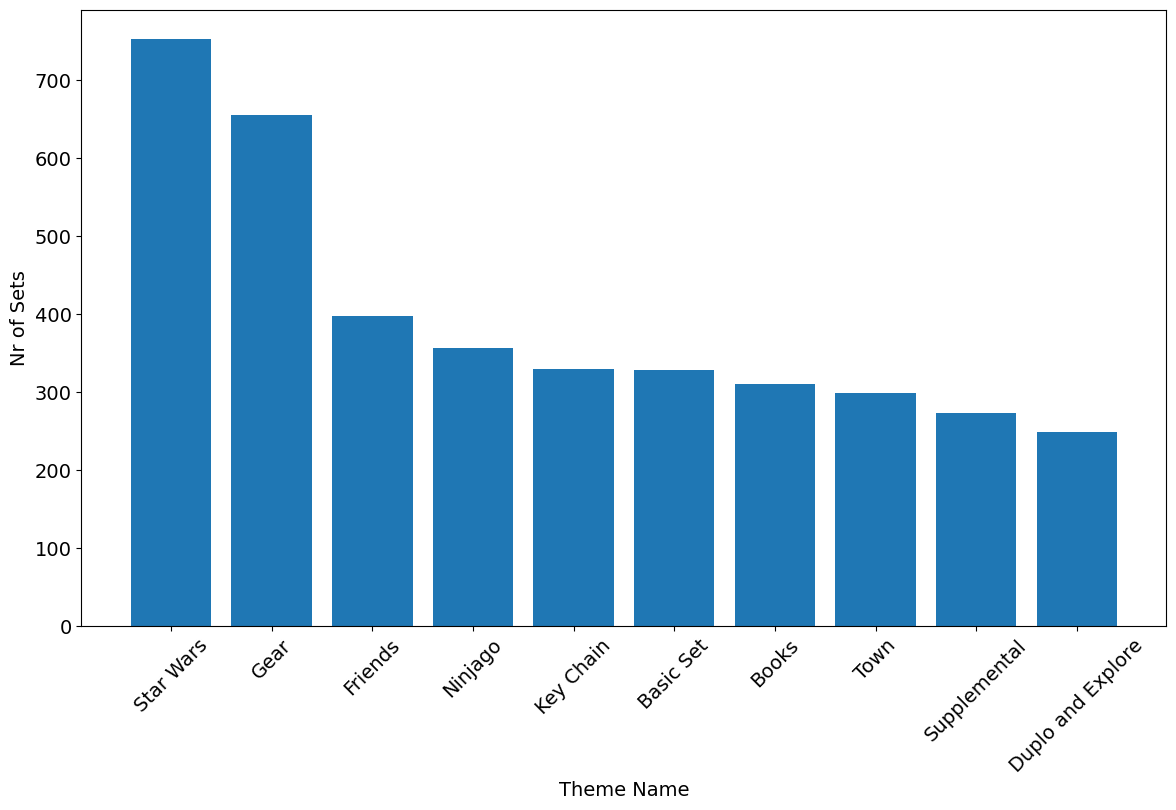

In [106]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

C:\Users\Daniele\AppData\Local\Temp\ipykernel_10768\2415577808.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ar.name_x[:10], ar.id[:10])


<BarContainer object of 10 artists>

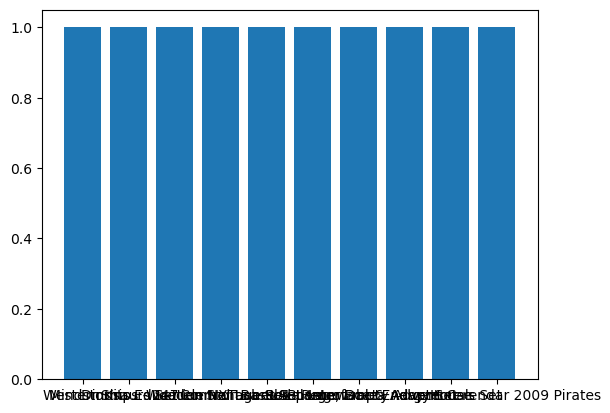

,name_x,year,id
theme_id,,,
475,Western Kit,2002,1
515,Dinosaurs Set,2001,1
519,Mindstorms Education NXT Base Set,2006,1
510,Ships - 247 elements and 1 poster,1985,1
383,"Wooden Storage Box Large, Empty",1967,1
...,...,...,...
503,LEGO Minifigure Key Light,2011,329
435,Garmadon,2019,356
494,Build Your Own Adventure with Liza Mini-Doll a...,2015,398
